In [1]:
%matplotlib inline

from TTS.utils.audio import AudioProcessor
from TTS.tts.utils.visual import plot_spectrogram
from TTS.config import load_config

import IPython.display as ipd
import glob

In [2]:
from TTS.config.shared_configs import BaseAudioConfig
CONFIG = BaseAudioConfig()

## ✍️ Set these values 

In [3]:
data_path = "/home/jhlfrfufyfn/dev/diplom/filtered_dataset"
file_ext = ".wav"

## Read audio files

In [4]:
file_paths = glob.glob(data_path + f"/**/*{file_ext}", recursive=True)

# Change this to the index of the desired file listed below
sample_file_index = 100

SAMPLE_FILE_PATH = file_paths[sample_file_index]

print("File list, by index:")
dict(enumerate(file_paths))

File list, by index:


{0: '/home/jhlfrfufyfn/dev/diplom/filtered_dataset/common_voice_be_30778219.wav',
 1: '/home/jhlfrfufyfn/dev/diplom/filtered_dataset/common_voice_be_30016957.wav',
 2: '/home/jhlfrfufyfn/dev/diplom/filtered_dataset/common_voice_be_30899596.wav',
 3: '/home/jhlfrfufyfn/dev/diplom/filtered_dataset/common_voice_be_30016835.wav',
 4: '/home/jhlfrfufyfn/dev/diplom/filtered_dataset/common_voice_be_30572715.wav',
 5: '/home/jhlfrfufyfn/dev/diplom/filtered_dataset/common_voice_be_30897961.wav',
 6: '/home/jhlfrfufyfn/dev/diplom/filtered_dataset/common_voice_be_30730628.wav',
 7: '/home/jhlfrfufyfn/dev/diplom/filtered_dataset/common_voice_be_30426134.wav',
 8: '/home/jhlfrfufyfn/dev/diplom/filtered_dataset/common_voice_be_30687765.wav',
 9: '/home/jhlfrfufyfn/dev/diplom/filtered_dataset/common_voice_be_30545106.wav',
 10: '/home/jhlfrfufyfn/dev/diplom/filtered_dataset/common_voice_be_30896893.wav',
 11: '/home/jhlfrfufyfn/dev/diplom/filtered_dataset/common_voice_be_29256716.wav',
 12: '/home/jh

## ✍️ Set Audio Processor
Play with the AP parameters until you find a good fit with the synthesis speech below.

The default values are loaded from your config.json file, so you only need to
uncomment and modify values below that you'd like to tune.

In [5]:

tune_params = {
    "mel_fmin": 50.0,# ??
    "mel_fmax": 8000,# ??
}

# Override select parts of loaded config with parameters above
tuned_config = CONFIG.copy()
tuned_config.update(tune_params)

AP = AudioProcessor(
    **tuned_config
)


 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log10
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:True
 | > symmetric_norm:True
 | > mel_fmin:50.0
 | > mel_fmax:8000
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:20.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:True
 | > trim_db:45
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:10
 | > hop_length:256
 | > win_length:1024


### Check audio loading 

In [6]:
wav = AP.load_wav(SAMPLE_FILE_PATH)
ipd.Audio(data=wav, rate=AP.sample_rate) 

### Generate Mel-Spectrogram and Re-synthesis with GL

In [7]:
%matplotlib inline
AP.power = 1.5

Max: 2.8030868
Min: -4.0
Mean: -0.9988845


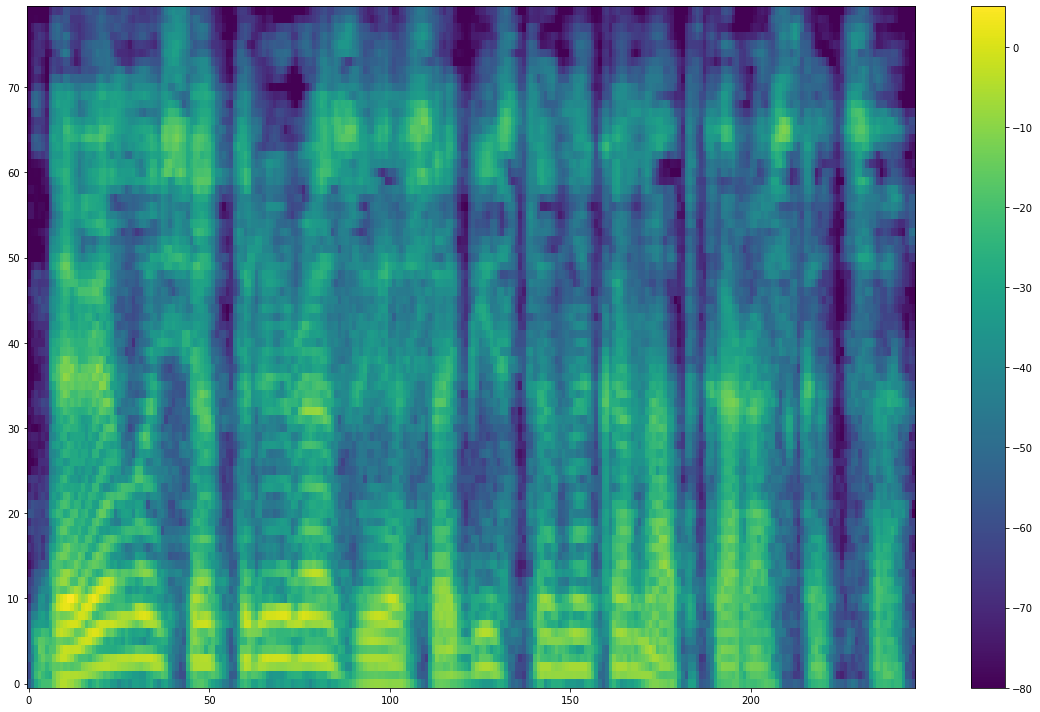

In [8]:
mel = AP.melspectrogram(wav)
print("Max:", mel.max())
print("Min:", mel.min())
print("Mean:", mel.mean())
plot_spectrogram(mel.T, AP, output_fig=True)

wav_gen = AP.inv_melspectrogram(mel)
ipd.Audio(wav_gen, rate=AP.sample_rate)

### Generate Linear-Spectrogram and Re-synthesis with GL

In [9]:
spec = AP.spectrogram(wav)
print("Max:", spec.max())
print("Min:", spec.min())
print("Mean:", spec.mean())
plot_spectrogram(spec.T, AP, output_fig=True)

wav_gen = AP.inv_spectrogram(spec)
ipd.Audio(wav_gen, rate=AP.sample_rate)

Max: 4.0
Min: -4.0
Mean: 0.04619219


### Compare values for a certain parameter

Optimize your parameters by comparing different values per parameter at a time.

In [ ]:
from librosa import display
from matplotlib import pylab as plt
import IPython
plt.rcParams['figure.figsize'] = (20.0, 16.0)

def compare_values(attribute, values):
    """
    attributes (str): the names of the attribute you like to test.
    values (list): list of values to compare.
    """
    file = SAMPLE_FILE_PATH
    wavs = []
    for idx, val in enumerate(values):
        set_val_cmd = "AP.{}={}".format(attribute, val)
        exec(set_val_cmd)
        wav = AP.load_wav(file)
        spec = AP.spectrogram(wav)
        spec_norm = AP.denormalize(spec.T)
        plt.subplot(len(values), 2, 2*idx + 1)
        plt.imshow(spec_norm.T, aspect="auto", origin="lower")
        #         plt.colorbar()
        plt.tight_layout()
        wav_gen = AP.inv_spectrogram(spec)
        wavs.append(wav_gen)
        plt.subplot(len(values), 2, 2*idx + 2)
        display.waveshow(wav, alpha=0.5)
        display.waveshow(wav_gen, alpha=0.25)
        plt.title("{}={}".format(attribute, val))
        plt.tight_layout()
    
    wav = AP.load_wav(file)
    print(" > Ground-truth")
    IPython.display.display(IPython.display.Audio(wav, rate=AP.sample_rate))
    
    for idx, wav_gen in enumerate(wavs):
        val = values[idx]
        print(" > {} = {}".format(attribute, val))
        IPython.display.display(IPython.display.Audio(wav_gen, rate=AP.sample_rate))

 > Ground-truth


 > preemphasis = 0


 > preemphasis = 0.5


 > preemphasis = 0.97


 > preemphasis = 0.98


 > preemphasis = 0.99


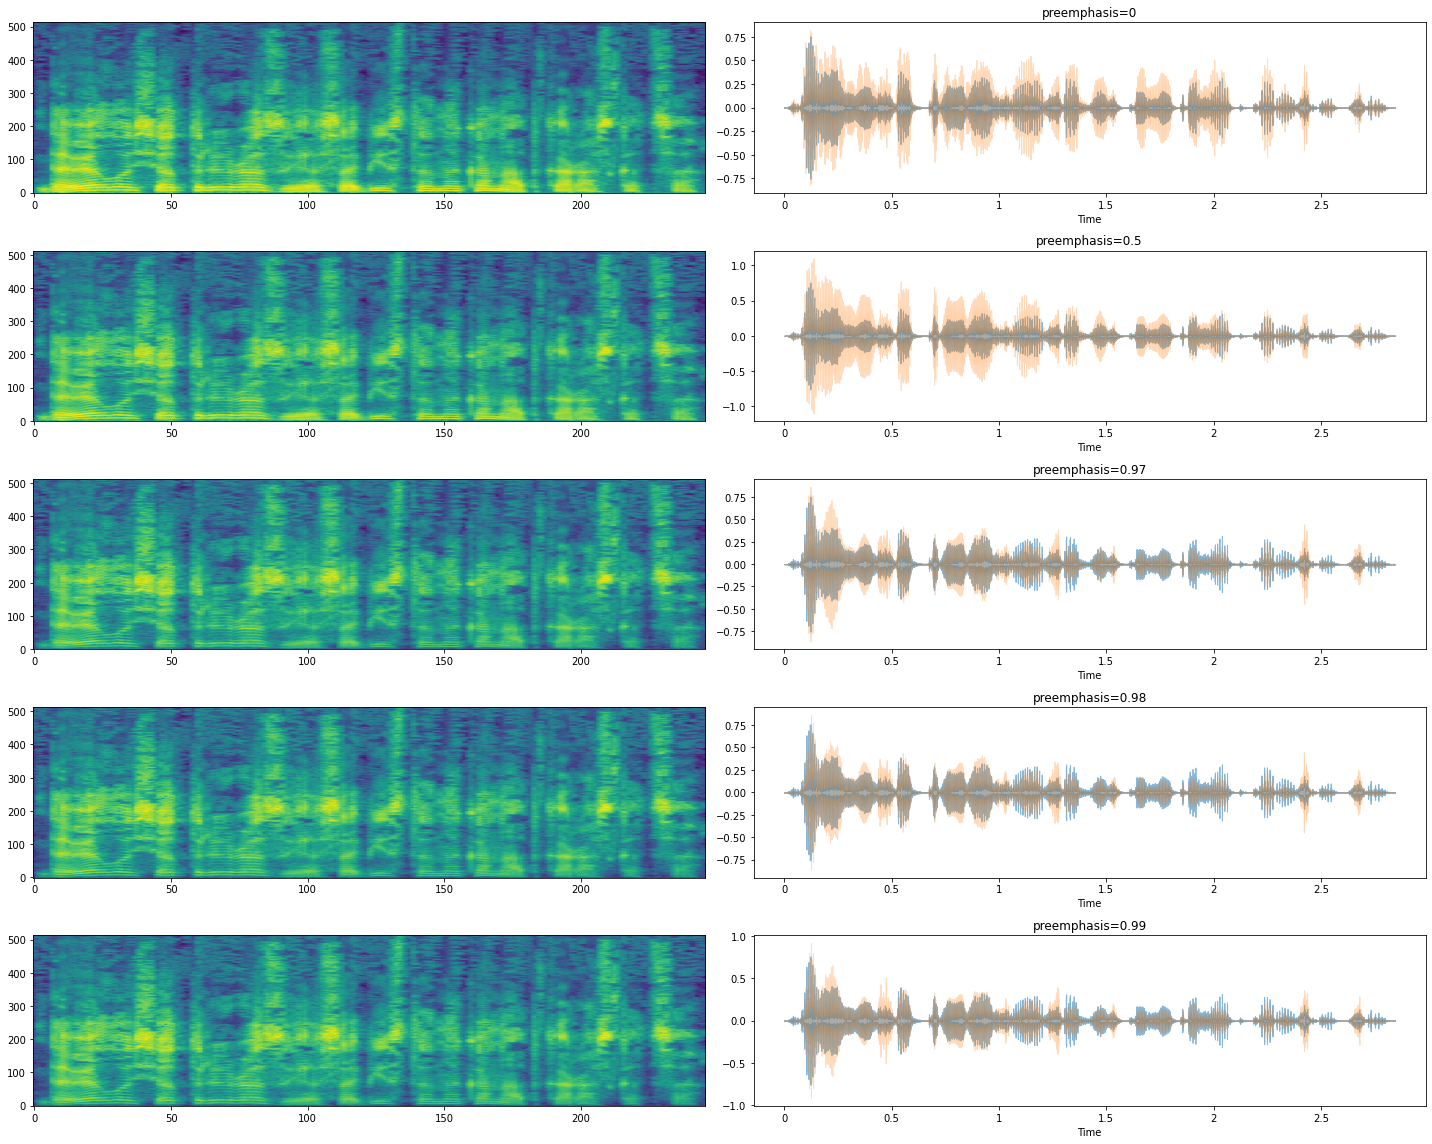

In [ ]:
compare_values("preemphasis", [0, 0.5, 0.97, 0.98, 0.99])